### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import SGD 

Using TensorFlow backend.


In [2]:
tf.__version__

'1.14.0'

In [3]:
tf.set_random_seed(42)

In [4]:
start_time = time.time()
start_time

1566710721.7026007

## Common Functions - START

In [5]:
def max_index(r):
    #print(r)
    max = r[0]
    idx = 0
    for i in range(1, len(r)):
        if r[i] > max:
            max = r[i]
            idx = i
    return idx

## Common Functions - END

### Collect Data

In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

__Information About Fashion-MNIST database of fashion articles__

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

    Label	Description
        0	T-shirt/top
        1	Trouser
        2	Pullover
        3	Dress
        4	Coat
        5	Sandal
        6	Shirt
        7	Sneaker
        8	Bag
        9	Ankle boot

__Usage:__

    from keras.datasets import fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

__Returns:__
    2 tuples:
        x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
        y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [7]:
# BTW, the 4 data files are downloaded to : C:\Users\Beejal\.keras\datasets\fashion-mnist
# 1. t10k-images-idx3-ubyte.gz  - testX
# 2. t10k-labels-idx1-ubyte.gz  - testY
# 3. train-images-idx3-ubyte.gz - trainX
# 4. train-labels-idx1-ubyte.gz - trainY

In [8]:
trainY[0:5]
# So the 1st train image is 'Ankle boot', 2nd, 3rd & 5th are 'T-shirt/top', 4th is 'Dress'

array([9, 0, 0, 3, 0], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
n_classes = 10  # Since we have 10 classes as output
# I create one-hot vectors using get_dummies. So let me continue with that.
y_train =  tf.keras.utils.to_categorical(trainY, n_classes)
y_test =  tf.keras.utils.to_categorical(testY, n_classes)

In [10]:
print('Now first 5 examples of trainY looks as below: \n', y_train[0:5])

Now first 5 examples of trainY looks as below: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
print('Now first 5 examples of testY looks as below: \n', y_test[0:5])

Now first 5 examples of testY looks as below: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [12]:
# Let's first understand the datastructure of trainX
trainX.shape
# So it has got 60,000 records. With each record having 28 rows and 28 columns.

(60000, 28, 28)

In [13]:
# Now let's see how an image record looks like. Given images are grayscale images so each value in the given record
# represents the brightness of the pixel. The most common pixel format is the byte image, 
# where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. 
# Typically zero is taken to be black, and 255 is taken to be white.
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
# Python has a library named Pillow (Python Im) https://python-pillow.org/ for working with images. So let's install this library.
!pip install Pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


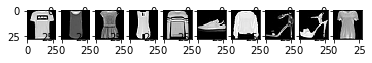

In [15]:
# So Pillow is already there. Now let's use it to meet our requirement.
from PIL import Image
%matplotlib inline

#plt.figure(figsize=(8, 8))
n = 10
plt.subplots(1, n)

for i in range(1, n + 1):
    plt.subplot(1, n, i)
    data = trainX[i]
    plt.imshow(data, cmap='gray', interpolation='nearest')

plt.show()
plt.close()

In [16]:
# Let's transform the Independent Variables.

# Each image has 28 rows and 28 columns. Instead of Matrix (2D), if we want flatten it to 1D, then an image can be 
# represented by 28 * 28 = 784 values.

n_inputs = 784

x_train = trainX.reshape( trainX.shape[0], n_inputs) 
x_test = testX.reshape( testX.shape[0], n_inputs) 

# convert the input values to float32 
x_train = x_train.astype( np.float32) 
x_test = x_test.astype( np.float32) 

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [17]:
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [18]:
batch_size = 100
n_epochs = 100

In [19]:
# Build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='sigmoid')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

W0825 10:55:25.040283 13996 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 10:55:25.042315 13996 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 10:55:25.045268 13996 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 10:55:25.063255 13996 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 10:55:25.071209 13996 deprecation.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [20]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs)

W0825 10:55:25.234892 13996 deprecation.py:323] From C:\Users\Beejal\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
60000/60000 [==============================] - 4s 67us/step - loss: 2.0899 - acc: 0.3304
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 1.5607 - acc: 0.5750
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 1.1891 - acc: 0.6496
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.9814 - acc: 0.6862
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.8536 - acc: 0.7196
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.7703 - acc: 0.7447
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.7121 - acc: 0.7626
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6665 - acc: 0.7777
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6298 - acc: 0.7885
Epoch 10/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6049 - a

60000/60000 [==============================] - 2s 30us/step - loss: 0.4514 - acc: 0.8393
Epoch 82/100
60000/60000 [==============================] - ETA: 0s - loss: 0.4550 - acc: 0.838 - 2s 31us/step - loss: 0.4547 - acc: 0.8382
Epoch 83/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4571 - acc: 0.8343
Epoch 84/100
60000/60000 [==============================] - ETA: 0s - loss: 0.4676 - acc: 0.832 - 2s 31us/step - loss: 0.4676 - acc: 0.8328
Epoch 85/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4561 - acc: 0.8352
Epoch 86/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4593 - acc: 0.8359
Epoch 87/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4619 - acc: 0.8343
Epoch 88/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.4652 - acc: 0.8341
Epoch 89/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4530 - acc: 0.8391
Epoch 90/100
60000/

In [21]:
scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0])
print('\ n accuracy:', scores[ 1])

10000/10000 [==============================] - 0s 33us/step
\ n loss: 0.45662424952983854
\ n accuracy: 0.8386


In [22]:
print("Actual Image: ", testY[0:5])
predicted = model.predict(x_test[0:5])
print("Predicted Image :", [max_index(p) for p in predicted])

Actual Image:  [9 2 1 1 6]
Predicted Image : [9, 2, 1, 1, 6]


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [23]:
# Build a sequential model 

model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add(BatchNormalization(input_shape=(n_inputs,)))
model.add( Dense( units = 128, activation ='sigmoid')) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='sigmoid')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 121,418
Trainable params: 119,850
Non-trainable params: 1,568
____________________________________________

### Execute the model

In [24]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs)

Epoch 1/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.2280 - acc: 0.2200
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.8987 - acc: 0.4642
Epoch 3/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.4790 - acc: 0.5814
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.2049 - acc: 0.6482
Epoch 5/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.0284 - acc: 0.6851
Epoch 6/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.9124 - acc: 0.7068
Epoch 7/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.8314 - acc: 0.7211
Epoch 8/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7769 - acc: 0.7334
Epoch 9/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7380 - acc: 0.7415
Epoch 10/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.7038 - a

60000/60000 [==============================] - 2s 36us/step - loss: 0.3980 - acc: 0.8583
Epoch 82/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.3968 - acc: 0.8581
Epoch 83/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3943 - acc: 0.8582
Epoch 84/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3933 - acc: 0.8588
Epoch 85/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3954 - acc: 0.8576
Epoch 86/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3939 - acc: 0.8594
Epoch 87/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3934 - acc: 0.8584
Epoch 88/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.3919 - acc: 0.8596
Epoch 89/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3913 - acc: 0.8594
Epoch 90/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.3896 - acc: 

In [25]:
scores = model.evaluate( x_test, y_test) 
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[1])

10000/10000 [==============================] - 0s 42us/step
\ n loss: 0.3916099581003189
\ n accuracy: 0.8581


In [26]:
print("Actual Image: ", testY[0:5])
predicted = model.predict(x_test[0:5])
print("Predicted Image :", [max_index(p) for p in predicted])

Actual Image:  [9 2 1 1 6]
Predicted Image : [9, 2, 1, 1, 6]


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [27]:
# Build a sequential model 
lr=0.001
model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add(BatchNormalization(input_shape=(n_inputs,)))
model.add( Dense( units = 128, activation ='sigmoid')) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='sigmoid')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(lr), metrics =['accuracy']) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 121,418
Trainable params: 119,850
Non-trainable params: 1,568
____________________________________________

In [28]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs)

Epoch 1/100
60000/60000 [==============================] - 2s 41us/step - loss: 2.3669 - acc: 0.1172
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 2.3015 - acc: 0.1233
Epoch 3/100
60000/60000 [==============================] - 2s 38us/step - loss: 2.2677 - acc: 0.1352
Epoch 4/100
60000/60000 [==============================] - 3s 42us/step - loss: 2.2429 - acc: 0.1615
Epoch 5/100
60000/60000 [==============================] - 3s 43us/step - loss: 2.2196 - acc: 0.2060
Epoch 6/100
60000/60000 [==============================] - 2s 37us/step - loss: 2.1968 - acc: 0.2440
Epoch 7/100
60000/60000 [==============================] - 2s 37us/step - loss: 2.1705 - acc: 0.2813
Epoch 8/100
60000/60000 [==============================] - 2s 36us/step - loss: 2.1426 - acc: 0.3104
Epoch 9/100
60000/60000 [==============================] - 2s 40us/step - loss: 2.1086 - acc: 0.3401
Epoch 10/100
60000/60000 [==============================] - 2s 37us/step - loss: 2.0707 - a

60000/60000 [==============================] - 2s 36us/step - loss: 0.7505 - acc: 0.7431
Epoch 81/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7471 - acc: 0.7420
Epoch 82/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7409 - acc: 0.7450
Epoch 83/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7390 - acc: 0.7467
Epoch 84/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7334 - acc: 0.7481
Epoch 85/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7322 - acc: 0.7470
Epoch 86/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7273 - acc: 0.7493
Epoch 87/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7238 - acc: 0.7502
Epoch 88/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7208 - acc: 0.7499
Epoch 89/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.7180 - acc: 

In [29]:
scores = model.evaluate( x_test, y_test) 
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[1])

10000/10000 [==============================] - 0s 45us/step
\ n loss: 0.6512007102012635
\ n accuracy: 0.7736


In [30]:
print("Actual Image: ", testY[0:5])
predicted = model.predict(x_test[0:5])
print("Predicted Image :", [max_index(p) for p in predicted])

Actual Image:  [9 2 1 1 6]
Predicted Image : [9, 2, 1, 1, 6]


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [31]:
# Build a sequential model 
lr = 0.03
model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 100, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 100, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs)

Epoch 1/100
60000/60000 [==============================] - 2s 34us/step - loss: 1.8611 - acc: 0.4113
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 1.3339 - acc: 0.6130
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 1.0611 - acc: 0.6691
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.9136 - acc: 0.6965
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.8183 - acc: 0.7222
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.7530 - acc: 0.7399
Epoch 7/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.7059 - acc: 0.7529
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6683 - acc: 0.7657
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6401 - acc: 0.7755
Epoch 10/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.6185 - a

60000/60000 [==============================] - 2s 30us/step - loss: 0.4792 - acc: 0.8288
Epoch 82/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4765 - acc: 0.8310
Epoch 83/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4825 - acc: 0.8279
Epoch 84/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4835 - acc: 0.8286
Epoch 85/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4804 - acc: 0.8289
Epoch 86/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4737 - acc: 0.8322
Epoch 87/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4822 - acc: 0.8284
Epoch 88/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4754 - acc: 0.8304
Epoch 89/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4728 - acc: 0.8316
Epoch 90/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.4660 - acc: 

In [33]:
scores = model.evaluate( x_test, y_test) 
print('\ n loss:', scores[ 0]) 
print('\ n accuracy:', scores[1])

10000/10000 [==============================] - 0s 38us/step
\ n loss: 0.4615376832723618
\ n accuracy: 0.8341


In [34]:
print("Actual Image: ", testY[0:5])
predicted = model.predict(x_test[0:5])
print("Predicted Image :", [max_index(p) for p in predicted])

Actual Image:  [9 2 1 1 6]
Predicted Image : [9, 2, 1, 1, 6]


## Review model

In [35]:
# Beejal - Done above`

### Run the model

In [36]:
# Beejal - Done above

In [37]:
end_time = time.time()
end_time

1566711540.3519387

In [38]:
print("Total Execution Time (Seconds): ", (end_time - start_time))

Total Execution Time (Seconds):  818.6493380069733
